In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore

from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset

vehicle_df = pd.read_csv("vehicle (2).csv")  


vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
df = vehicle_df.drop(['class'], axis=1)

In [5]:
df=df.dropna()
df.shape

(813, 18)

In [8]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


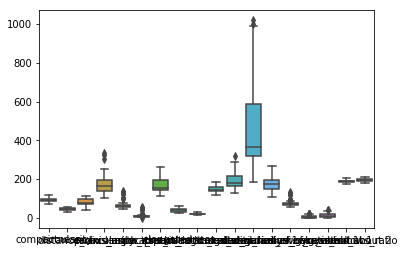

In [9]:
sns.boxplot(data=df)

In [10]:
df.shape

(813, 18)

In [11]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 18 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [13]:
df_median =df.median()

df.loc[pd.isnull(df['compactness']),'compactness']=df_median['compactness']
df.loc[pd.isnull(df['circularity']),'circularity']=df_median['circularity']
df.loc[pd.isnull(df['distance_circularity']),'distance_circularity']=df_median['distance_circularity']
df.loc[pd.isnull(df['radius_ratio']),'radius_ratio']=df_median['radius_ratio']
df.loc[pd.isnull(df['pr.axis_aspect_ratio']),'pr.axis_aspect_ratio']=df_median['pr.axis_aspect_ratio']
df.loc[pd.isnull(df['max.length_aspect_ratio']),'max.length_aspect_ratio']=df_median['max.length_aspect_ratio']
df.loc[pd.isnull(df['scatter_ratio']),'scatter_ratio']=df_median['scatter_ratio']
df.loc[pd.isnull(df['elongatedness']),'elongatedness']=df_median['elongatedness']
df.loc[pd.isnull(df['pr.axis_rectangularity']),'pr.axis_rectangularity']=df_median['pr.axis_rectangularity']
df.loc[pd.isnull(df['max.length_rectangularity']),'max.length_rectangularity']=df_median['max.length_rectangularity']
df.loc[pd.isnull(df['scaled_variance']),'scaled_variance']=df_median['scaled_variance']
df.loc[pd.isnull(df['scaled_variance.1']),'scaled_variance.1']=df_median['scaled_variance.1']
df.loc[pd.isnull(df['scaled_radius_of_gyration']),'scaled_radius_of_gyration']=df_median['scaled_radius_of_gyration']
df.loc[pd.isnull(df['scaled_radius_of_gyration.1']),'scaled_radius_of_gyration.1']=df_median['scaled_radius_of_gyration.1']
df.loc[pd.isnull(df['skewness_about']),'skewness_about']=df_median['skewness_about']
df.loc[pd.isnull(df['skewness_about.1']),'skewness_about.1']=df_median['skewness_about.1']
df.loc[pd.isnull(df['skewness_about.2']),'skewness_about.2']=df_median['skewness_about.2']


In [14]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

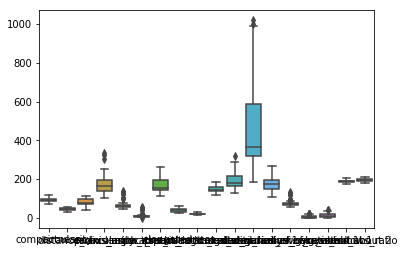

In [15]:
sns.boxplot(data=df)

In [16]:
lower_bound = .25
upper_bound = .75
quant_df = df.quantile([lower_bound, upper_bound]) # auxiliary dataframe, it consist of quantiles computed for each column

# select outliers, i.e. values lie outside corresponding [lower_bound, upper_bound] intervals
filtering_rule_2 = df.apply(lambda x: (x < quant_df.loc[lower_bound, x.name]) |  (x > quant_df.loc[upper_bound, x.name]), axis=0)


In [17]:
quant_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0.25,87.0,40.0,70.0,141.0,57.0,7.0,146.0,33.0,19.0,137.0,167.0,318.0,149.0,67.0,2.0,6.0,184.0,191.0
0.75,100.0,49.0,98.0,195.0,65.0,10.0,198.0,46.0,23.0,159.0,217.0,586.0,198.0,75.0,9.0,19.0,193.0,201.0


In [18]:
print(df[~(filtering_rule_2).any(axis=1)])

# or assign/create a new df
df_clean = df[~(filtering_rule_2).any(axis=1)]

     compactness  circularity  distance_circularity  radius_ratio  \
1           91.0         41.0                  84.0         141.0   
13          89.0         42.0                  85.0         144.0   
86          89.0         41.0                  84.0         141.0   
111         94.0         48.0                  83.0         162.0   
206         92.0         46.0                  79.0         176.0   
339         87.0         41.0                  73.0         158.0   
355         93.0         42.0                  88.0         188.0   
369         89.0         47.0                  81.0         156.0   
386         99.0         43.0                  89.0         195.0   
525         92.0         45.0                  76.0         162.0   
663         89.0         47.0                  83.0         169.0   
800         88.0         41.0                  80.0         147.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
1                    57.0        

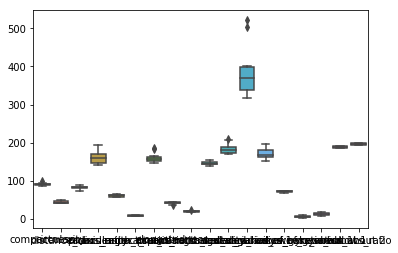

In [19]:
sns.boxplot(data=df_clean)

In [20]:
df.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
6,97.0,43.0,73.0,173.0,65.0,6.0,153.0,42.0,19.0,143.0,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204
7,90.0,43.0,66.0,157.0,65.0,9.0,137.0,48.0,18.0,146.0,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202
8,86.0,34.0,62.0,140.0,61.0,7.0,122.0,54.0,17.0,127.0,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208
10,86.0,36.0,70.0,143.0,61.0,9.0,133.0,50.0,18.0,130.0,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202
11,90.0,34.0,66.0,136.0,55.0,6.0,123.0,54.0,17.0,118.0,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202


E:\PYTHON SETUP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


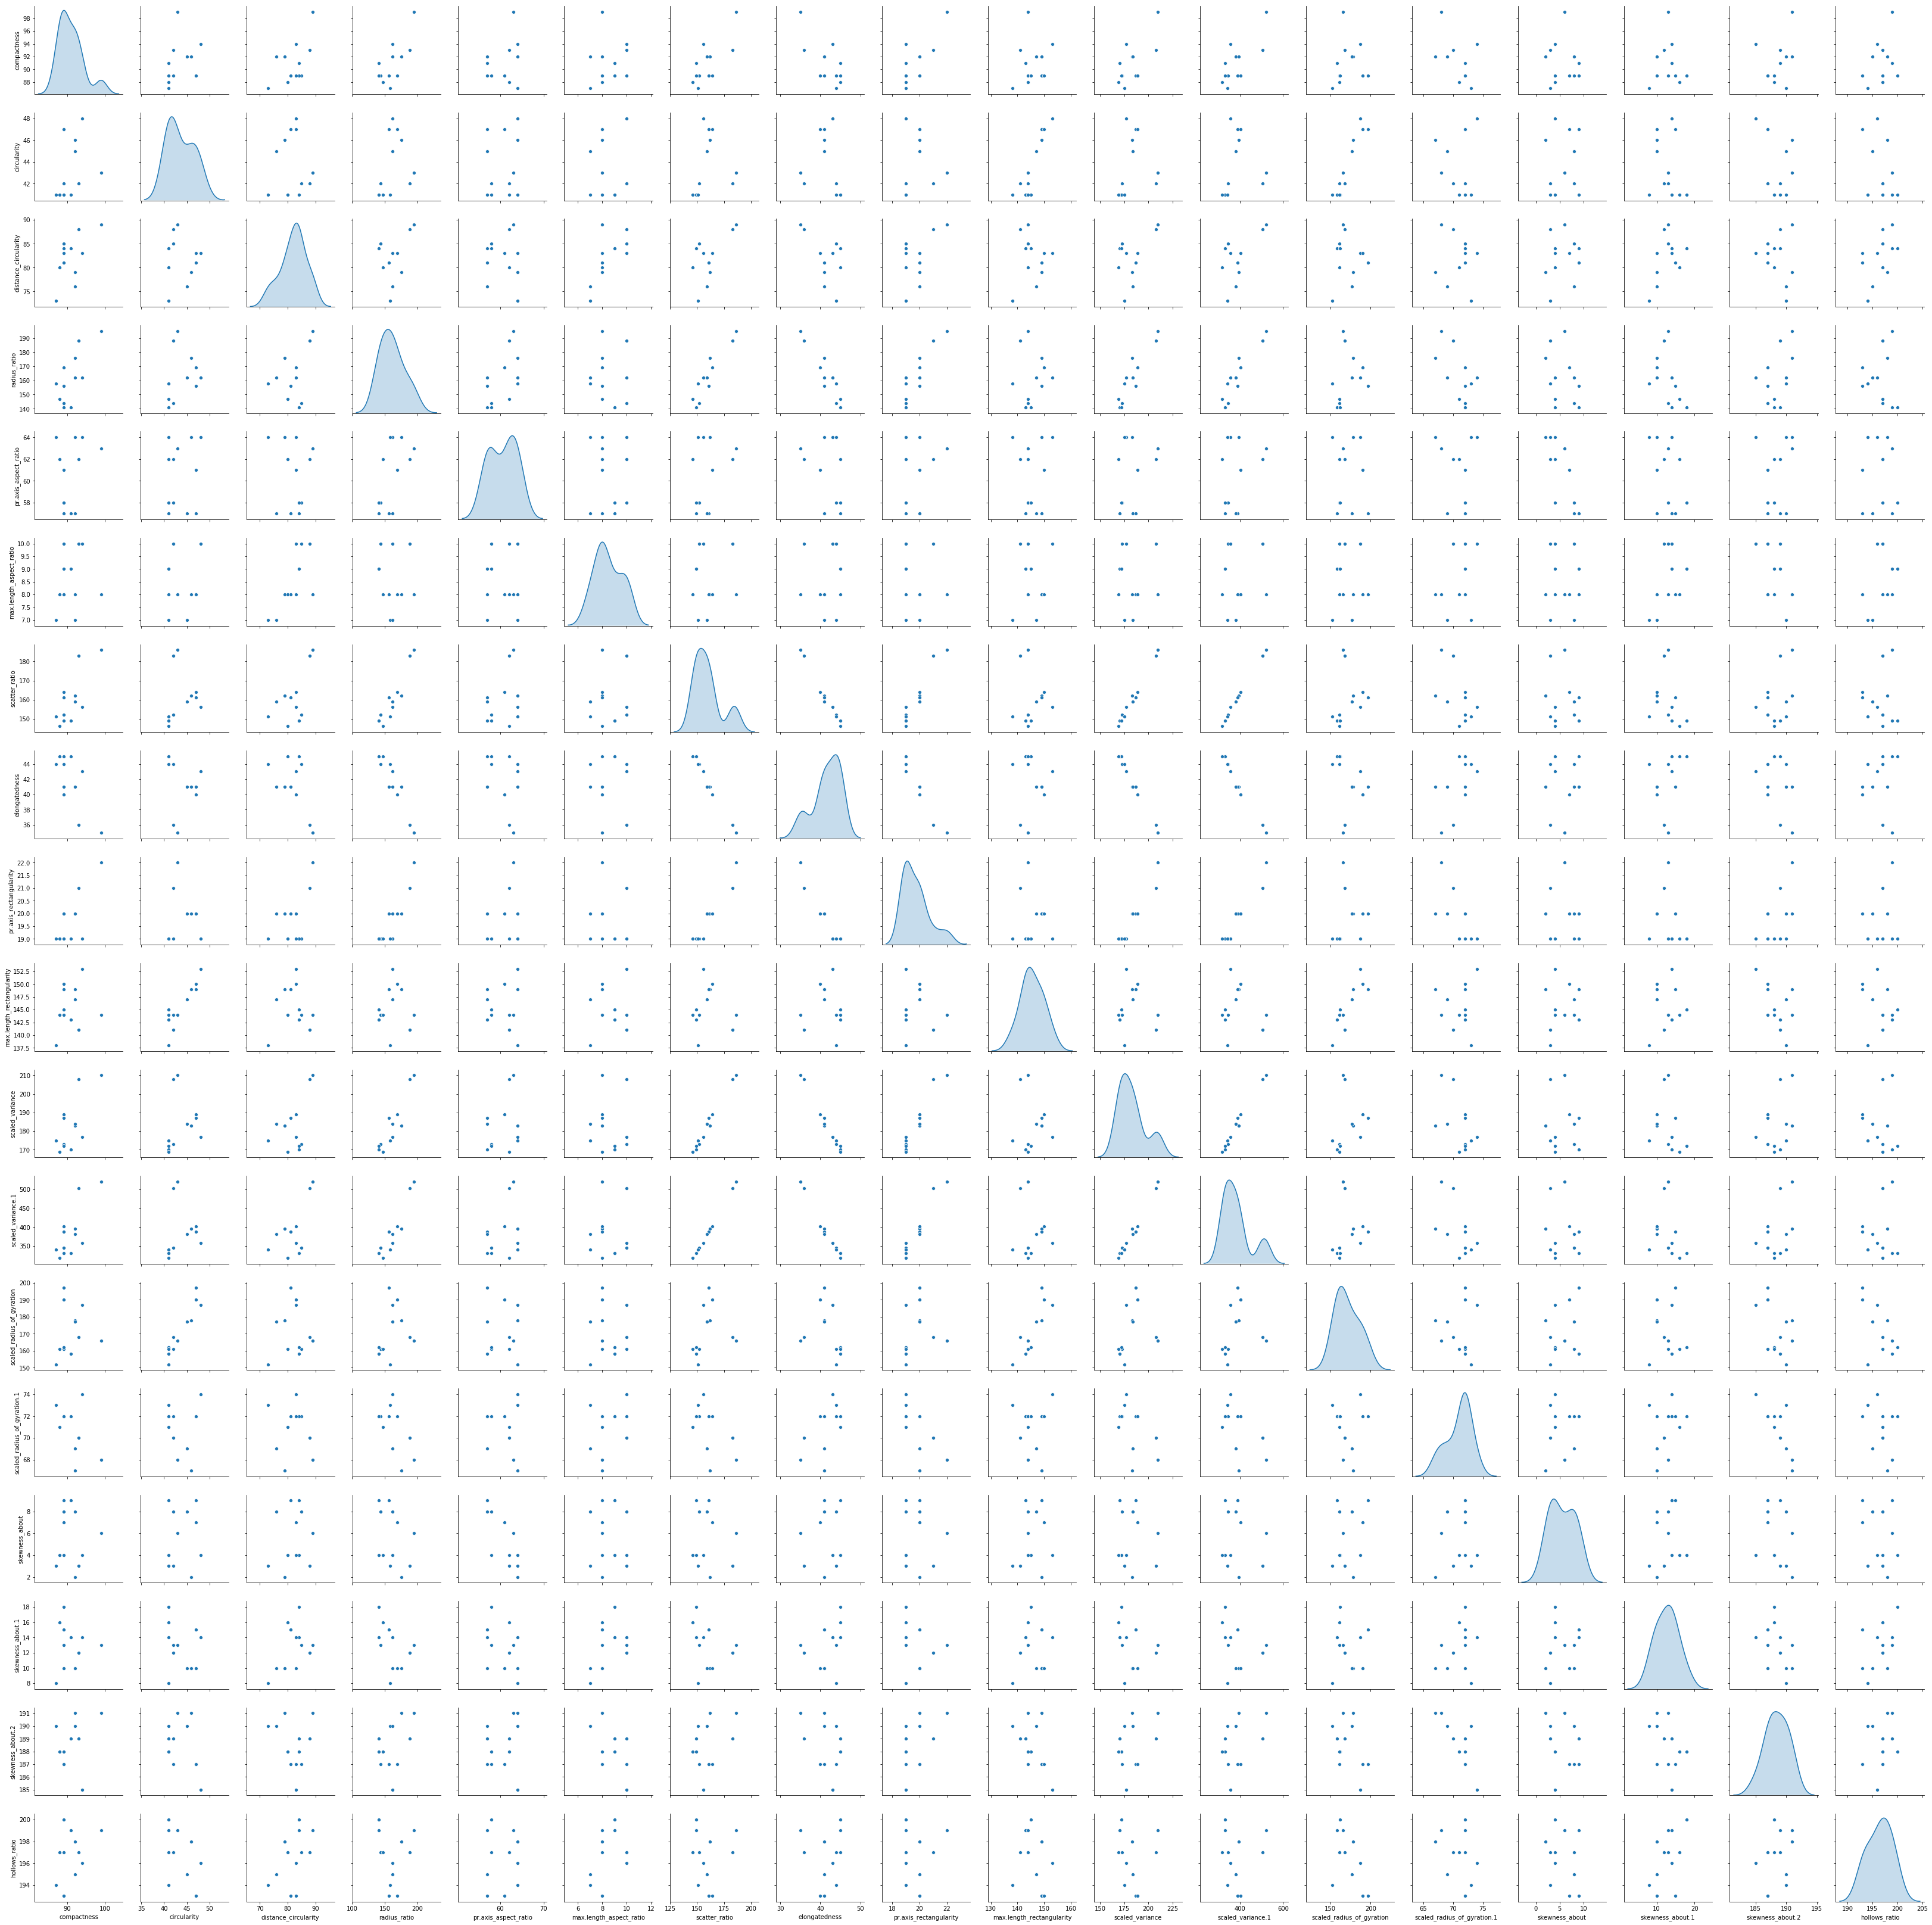

In [21]:
sns.pairplot(df_clean, diag_kind='kde') 

In [22]:

X = df_clean[df_clean.columns[1:-1]]




In [23]:
X.head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2
1,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0
13,42.0,85.0,144.0,58.0,10.0,152.0,44.0,19.0,144.0,173.0,345.0,161.0,72.0,8.0,13.0,187.0
86,41.0,84.0,141.0,58.0,9.0,149.0,45.0,19.0,145.0,172.0,330.0,162.0,72.0,4.0,18.0,188.0
111,48.0,83.0,162.0,64.0,10.0,156.0,43.0,19.0,153.0,177.0,357.0,187.0,74.0,4.0,14.0,185.0
206,46.0,79.0,176.0,64.0,8.0,162.0,41.0,20.0,149.0,183.0,396.0,178.0,67.0,2.0,10.0,191.0


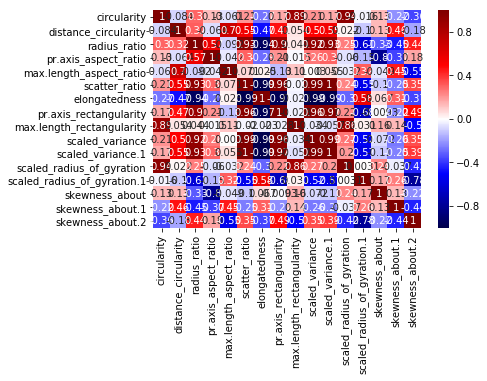

In [24]:
#heat map for correlation just to know the  quantified relation between the variable
#calculate the correlation matrix

corr = X.corr()

sns.heatmap(corr, cmap='seismic', annot=True, vmax=1, vmin=-1)

In [26]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.09090909 -0.09132995  0.33168699  0.13812802 -0.06655515  0.22558405
  -0.2913968   0.18738353  0.9703918   0.23167117  0.18228557  1.03027853
  -0.0173182   0.14722773 -0.23735247 -0.39450497]
 [-0.09132995  1.09090909  0.34503265 -0.06928656  0.76001244  0.59996293
  -0.51647024  0.5168835   0.05850407  0.54595855  0.59600782  0.02353563
  -0.11300657  0.14720499  0.50576773 -0.19306997]
 [ 0.33168699  0.34503265  1.09090909  0.61876229 -0.09985775  1.01858756
  -1.02643314  0.97896388  0.04774523  1.00309498  1.01565986  0.27506881
  -0.6609215  -0.35537185 -0.48683869  0.47807773]
 [ 0.13812802 -0.06928656  0.61876229  1.09090909 -0.04610085  0.33239438
  -0.3117888   0.23363138 -0.01662123  0.28683107  0.32746825 -0.06564275
  -0.15994428 -0.86957513 -0.40669165  0.19128361]
 [-0.06655515  0.76001244 -0.09985775 -0.04610085  1.09090909  0.07789307
   0.02688349 -0.14175755  0.11981045  0.00330682  0.0601071  -0.03531128
   0.34937052 -0.0538932   0.48827

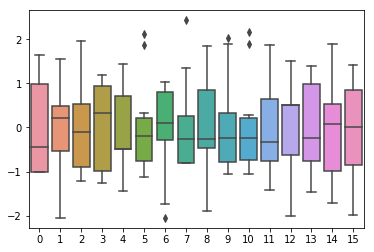

In [27]:
sns.boxplot(data=X_std)

In [28]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 9.02574571e-02+0.j          4.36860166e-01+0.j
  -3.48942219e-01+0.j         -4.36873833e-02+0.j
   1.20747702e-02+0.j         -1.07599009e-01+0.j
   1.62326767e-02+0.j         -2.62367032e-01+0.j
   2.38285640e-01+0.j          1.93294041e-02+0.j
  -5.46552609e-01+0.j         -1.17404077e-02-0.16531276j
  -1.17404077e-02+0.16531276j -2.89107056e-02+0.j
   2.04130278e-03+0.0752534j   2.04130278e-03-0.0752534j ]
 [ 1.56745958e-01+0.j          1.75052103e-01+0.j
   5.19346271e-01+0.j         -4.83507854e-02+0.j
   9.70033985e-02+0.j         -1.44544564e-01+0.j
   3.94189228e-01+0.j         -1.10826183e-01+0.j
  -5.15304615e-01+0.j         -3.80879721e-01+0.j
  -9.68918525e-02+0.j          5.62365114e-03-0.07975101j
   5.62365114e-03+0.07975101j  1.39236118e-02+0.j
   1.56095040e-02+0.03644516j  1.56095040e-02-0.03644516j]
 [ 3.68445900e-01+0.j         -2.22958441e-03+0.j
  -7.51854574e-02+0.j         -1.36394172e-01+0.j
  -4.85408673e-02+0.j         -1.93792628e-03+0.

In [29]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,(7.62743087866364+0j),(3.601054498899486+0j),(2.6708496465222424+0j),(1.8776835434100252+0j),(0.8788052864861532+0j),(0.44791019399393406+0j),(0.21753331124974137+0j),(0.0553584290722438+0j),(0.04501626240258634+0j),(0.029602345626900055+0j),(0.0033010582185035386+0j),(-3.5415553100847104e-16+2.4545900507567437e-16j),(-3.5415553100847104e-16-2.4545900507567437e-16j),(4.1788086490765283e-16+0j),(4.9186449652123165e-17+2.2209400818149013e-17j),(4.9186449652123165e-17-2.2209400818149013e-17j)


In [30]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 43.69882274+0.00000000e+00j  64.32986414+0.00000000e+00j
  79.63160691+0.00000000e+00j  90.38916888+0.00000000e+00j
  95.42399083+0.00000000e+00j  97.99014298+0.00000000e+00j
  99.23642758+0.00000000e+00j  99.55358525+0.00000000e+00j
  99.81149092+0.00000000e+00j  99.98108769+0.00000000e+00j
 100.        +0.00000000e+00j 100.        +0.00000000e+00j
 100.        +1.27241359e-16j 100.        +0.00000000e+00j
 100.        +1.40627555e-15j 100.        +0.00000000e+00j]


In [31]:
from sklearn.decomposition import PCA

pcamodel = PCA(n_components=2)
pcamodel.fit(df_clean)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
pcamodel.components_

array([[ 3.45422332e-02,  7.22840378e-03,  3.47797850e-02,
         2.35984645e-01,  1.31987255e-02,  7.02147487e-04,
         1.81561828e-01, -4.74785284e-02,  1.31685679e-02,
        -2.42685080e-03,  1.93066981e-01,  9.30904292e-01,
         4.36895905e-02, -1.68340914e-02, -4.20750425e-03,
        -1.07104095e-02,  9.96174722e-03,  1.34575368e-03],
       [-3.10450617e-03,  1.74267214e-01, -3.70895879e-02,
         7.94336798e-02, -1.82699344e-02, -4.32795139e-03,
         1.82277689e-02, -2.04144790e-02,  5.28436868e-04,
         2.53803051e-01,  4.63307010e-02, -7.58640365e-02,
         9.34801639e-01,  1.72052468e-02,  4.24650806e-02,
        -2.26117744e-03, -6.30693791e-02, -9.26283275e-02]])

In [33]:
df_comp = pd.DataFrame(pcamodel.components_,columns=df_clean.columns.values)

In [34]:
df_comp.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.034542,0.007228,0.03478,0.235985,0.013199,0.000702,0.181562,-0.047479,0.013169,-0.002427,0.193067,0.930904,0.043690,-0.016834,-0.004208,-0.010710,0.009962,0.001346
1,-0.003105,0.174267,-0.03709,0.079434,-0.018270,-0.004328,0.018228,-0.020414,0.000528,0.253803,0.046331,-0.075864,0.934802,0.017205,0.042465,-0.002261,-0.063069,-0.092628


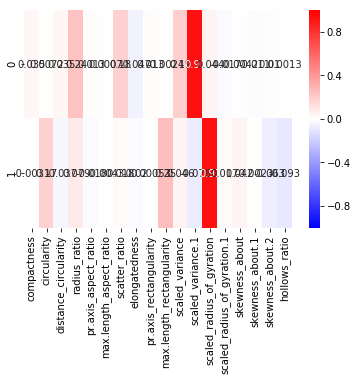

In [35]:
sns.heatmap(df_comp,cmap='bwr', annot=True,vmax=1,vmin=-1)

In [36]:
df_dim = pcamodel.transform(df_clean)

In [37]:
df_dim

array([[-60.79078746, -12.15252926],
       [-44.84013476,  -9.38791065],
       [-60.32105468,  -8.07604518],
       [-26.58458164,  19.074942  ],
       [ 15.00436291,   7.28329108],
       [-45.76702089, -17.74873874],
       [127.04264886, -10.38938014],
       [  3.92526339,  25.55454212],
       [145.71072743, -12.17467479],
       [ -2.93101409,   6.55779414],
       [ 20.88008938,  19.18215102],
       [-71.32849845,  -7.7234416 ]])

In [38]:
component1 = df_dim[:,0]
component2 = df_dim[:,1]

In [39]:
x = {'comp1':component1,'comp2':component2}

In [40]:
dim_df = pd.DataFrame(x)

In [41]:
dim_df.shape

(12, 2)

E:\PYTHON SETUP\lib\site-packages\matplotlib\transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
E:\PYTHON SETUP\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


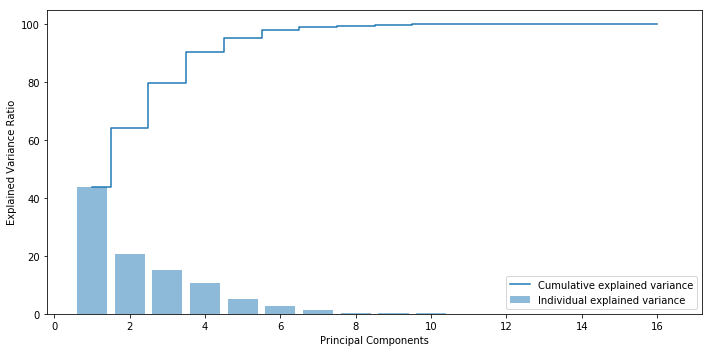

In [42]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()